<a href="https://colab.research.google.com/github/Ugo-Ogbodo/Personal_learns/blob/main/Demo_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

interactive(children=(IntSlider(value=1, description='hidden_layer_size', max=10, min=1), Output()), _dom_clas…

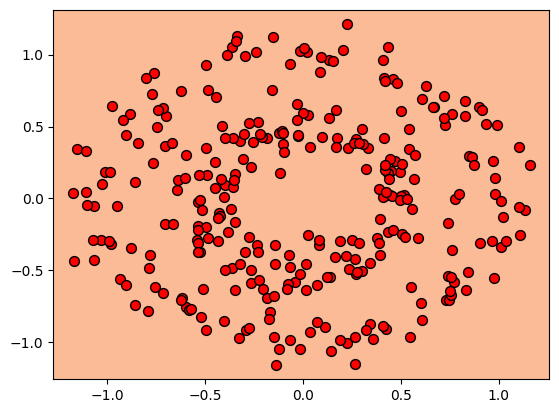

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

#X, y = make_cireles(n_samples=300, noise=0.1, factor=0.5, random state=0)
#Function to update and display the plot
def update_plot(hidden_layer_size):
    #Generate synthetic data (circle)
    X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

    #Create multi-layer perceptron (MLP) classifier
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),
                        activation ='relu', max_iter=3000, random_state=1)

    # Fit the classifier to the data
    clf.fit(X, y)

    #Create a grid of points for visualization
    #These are 1D arrays of 100 values each, representing the x and y coordinates of the grid.
    x_vals = np.linspace(X[:, 0].min() -0.1, X[:, 0].max()+0.1, 100)
    y_vals = np.linspace(X[:, 1].min() -0.1, X[:, 1].max()+0.1, 100)

    #The resulting X plane and Y plane are both 100x188 arrays, #representing a grid of 10,000 points.
    X_plane, Y_plane = np.meshgrid(x_vals, y_vals)

    #grid points is a single 20 array (grid points) of shape (18089, 2),
    #where each row represents a point in the grid.
    grid_points = np.column_stack((X_plane.ravel(), Y_plane.ravel()))

    #Predict class labels for the grid points (for decision boundary)
    Z = clf.predict(grid_points)

    #Z.reshape(X plane.shape) reshapes Z into a 100x100 array.
    Z = Z.reshape(X_plane.shape)

    #Predict class labels for the original data points
    y_pred = clf.predict(X)

    #Clear previous plot
    plt.clf()

    #Plot cision boundary
    #It is used to visualize the decision boundary of a model by plotting
    #the predics d class probabilities or labels across a grid of points.
    plt.contourf(X_plane, Y_plane, Z, levels=[-0.5, 0.5, 1.5], cmap=plt.cm.RdYlGn, alpha=0.6)

    #Plot the original data points with their predicted labels
    #separate points for each predicted class
    class_0 = y_pred == 0 #Indices of points predicted as class 0
    class_1 = y_pred == 1 #Indices of points predicted as class 1

    plt.scatter(X[class_0, 0], X[class_0, 1], c='red', edgecolors='k', marker='o', s=50, label='Predicted Class 0')
    plt.scatter(X[class_1, 0], X[class_1, 1], c='green', edgecolors='k', markers='o', s=50, label='Predicted Class 1')

    #Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary and Predicted Labels (Hidden Layer Size (hidden_layer_size))')
    plt.legend()
    plt.show()

#Create a slider for hidden layer size
hidden_layer_size_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, descriptions="Hidden Layer Size")

#Create an interactive widget
interactive_plot = interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)

#Display the widgets
display(interactive_plot)